In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpl
from scipy.signal import find_peaks

In [107]:
from sp500_variables import sp500_dict, sp500_all
from utils import Say, now_date
from cleaning import cleaning

say = Say()

In [104]:
def get_variaciones(df):
    variaciones = df.Close.pct_change()

    return variaciones

def get_volatilidad(df):
    var = get_variaciones(df)
    volatilidad = var.rolling(250).std()*100*(250)**0.5

    return volatilidad

def find_peak(df):
    vol = get_volatilidad(df)
    peaks, _ = find_peaks(vol, prominence=3)
    return peaks, vol

def retornos_gap(df):
    return np.log(df.Open/df.Close.shift(1)).fillna(0)   

def retornos_intra(df):
    return np.log(df['Close']/df.Open).fillna(0) 
    


In [4]:
labels = cleaning()
data_dict = sp500_dict(labels)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
sp500 = sp500_all()

In [5]:
data_dict.keys()

dict_keys(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP'])

In [120]:
vol1 = get_volatilidad(sp500)
vol1 = vol1.dropna()

_ ,vol2 = find_peak(sp500)
vol2 = vol2.dropna()

print(vol1.shape)

(5408,)


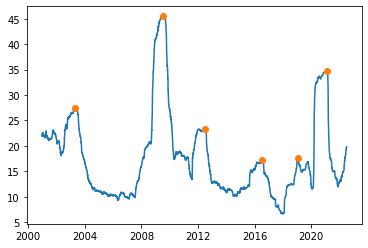

In [124]:

vol = get_volatilidad(sp500)

vol.dropna()
peaks, _ = find_peaks(vol, prominence=3)
plt.plot(vol)
plt.plot(vol[peaks], 'o')



In [133]:
def plot_peaks(df):

    vol = get_volatilidad(df)
    vol = vol.dropna()

    vol.dropna()
    peaks, _ = find_peaks(vol, prominence=3)
    plt.plot(vol)
    plt.plot(vol[peaks], 'o')
    path = f"./out/report_peaks-{now_date()}.png"
    plt.savefig(path)

    return say.cow_says_good(f'Graficos Generados en {path}')

 _________________________________________________________ 
< Graficos Generados en ./out/report_peaks-28_06_2022.png > 
 --------------------------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  good )\/\ 
                ||----w | 
                ||     || 


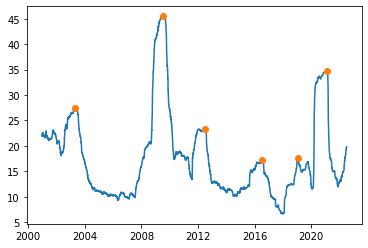

In [134]:
plot_peaks(sp500)

In [101]:
peaks, vol = find_peaks(vol, prominence=3)

list = ''

for i in range(vol[peaks].index.strftime('%m-%Y').shape[0]):
    list += '- ' + str(vol[peaks].index[i].strftime('%m-%Y')) + '\n'

print(list)

    

- 04-2003
- 07-2009
- 07-2012
- 06-2016
- 01-2019
- 02-2021



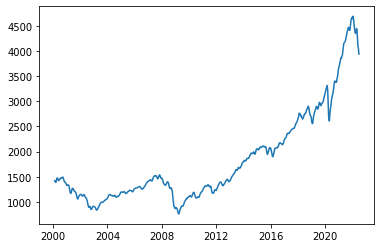

In [28]:
close = sp500.Close.rolling(window = 30).mean()
plt.plot(close)

In [23]:
retornos_gap(data_dict['MMM']).sum()


0.45012944333017

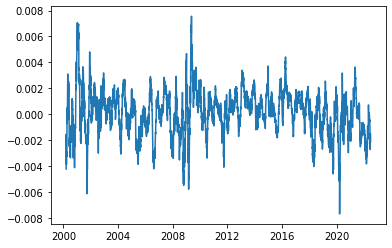

In [21]:
plt.plot(retornos_intra(data_dict['MMM']).rolling(window = 50).mean())